In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)      
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    
    # Support vectors indicated in plot by vertical lines

    sv = svc.support_vectors_
    print(sv[:,0])
    print(sv[:,1])
    #return 
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1) 
    plt.xlim(x_min, x_max)
    plt.ylim((y_min, y_max)) 
    plt.xlabel('X1')
    plt.ylabel('X2') 
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [10]:
from sklearn.svm import SVC
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Text(0, 0.5, 'X2')

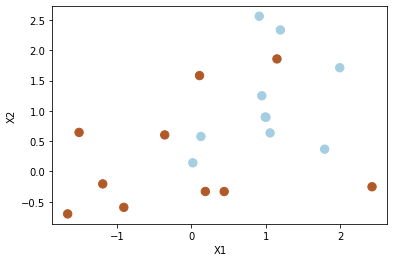

In [13]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

[ 0.01939211  0.12812082  1.05914424  1.00328884  1.79305332  0.99380509
  0.94769185  0.44122749  2.43077119  0.10960984  0.18760323 -0.35882895
  1.15139101]
[ 0.14314685  0.57749207  0.63668912  0.89406956  0.36842837  0.89893239
  1.24921766 -0.33087015 -0.25209213  1.58248112 -0.32986996  0.6034716
  1.85733101]


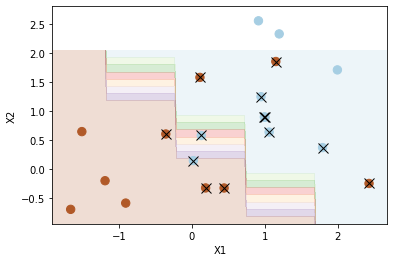

Number of support vectors:  13


In [32]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)
plot_svc(svc, X, y)

In [33]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

[ 0.01939211  0.12812082  1.05914424  1.00328884  1.79305332  0.99380509
  0.94769185  0.91312439  0.44122749  2.43077119  0.10960984 -0.9092324
  0.18760323 -0.35882895  1.15139101 -1.51117956]
[ 0.14314685  0.57749207  0.63668912  0.89406956  0.36842837  0.89893239
  1.24921766  2.56153229 -0.33087015 -0.25209213  1.58248112 -0.59163666
 -0.32986996  0.6034716   1.85733101  0.64484751]


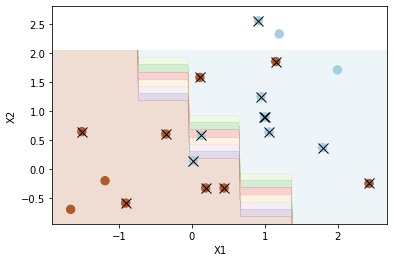

Number of support vectors:  16


In [34]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [47]:
from sklearn.model_selection import GridSearchCV
# Select the optimal C parameter by cross-validation

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf_cv = SVC(kernel='linear')
grid = GridSearchCV(clf_cv, param_grid =tuned_parameters, cv=10,scoring='f1')
grid.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='f1')

In [48]:
grid.cv_results_['mean_test_score']

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667])

In [49]:
grid.best_params_

{'C': 0.001}

In [50]:
np.random.seed(1)

X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

In [51]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[ 2,  6],
       [ 0, 12]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


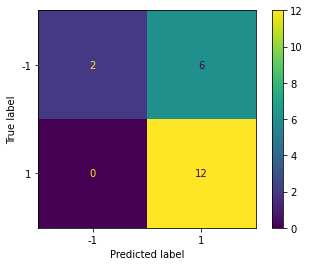

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc2, X_test, y_test);

Text(0, 0.5, 'X2')

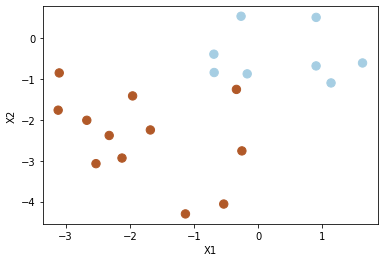

In [58]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

[-0.6871727  -3.10061918 -0.34019782]
[-0.84520564 -0.85527629 -1.25795584]


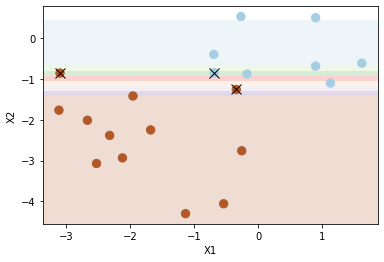

Number of support vectors:  3


In [59]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

[-0.17242821 -0.6871727  -0.25518824 -1.95778625 -0.34019782]
[-0.87785842 -0.84520564 -2.7612069  -1.41718479 -1.25795584]


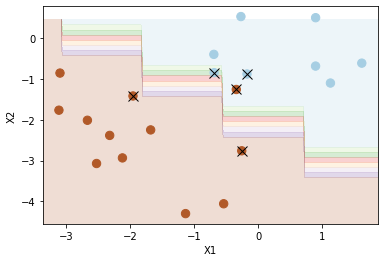

Number of support vectors:  5


In [60]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

Text(0, 0.5, 'X2')

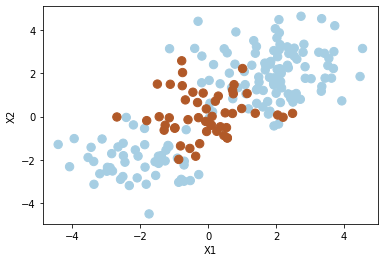

In [63]:
from sklearn.model_selection import train_test_split 
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

[-1.18058763 -2.83924572  0.03094408  2.71381616  3.93494274  1.42845036
 -3.18981569 -2.41067276 -3.94290072 -0.19057049 -0.18423032  3.68809504
  3.34137407  1.97778179  0.72541158  3.70202996  1.61119839 -4.07860947
 -0.70886688  2.53546825 -1.87150035  2.07399013  0.8766732   1.8186619
 -1.15517575 -2.32025901  2.79482764  2.03126431  0.05302969  3.03190655
  0.13020064  2.33502323  1.42220084  3.72783617 -0.70215687 -0.67000276
 -0.59232372 -0.75278761  0.74130414  1.14789767 -0.2484897  -1.49394832
 -0.7778395  -0.36641793  0.50190196  0.11737178 -1.80838486  0.2113841
  0.54040946 -0.1460668  -0.86512186  2.04652928  0.46336078  1.38799428]
[-1.33782272 -1.71724032  1.67303168  0.79918652  0.72510773  0.60999683
 -2.64894944 -0.04083284 -1.0212582   1.56392794  2.7989106   2.22378562
  4.53135684  4.06593628  0.82705629  3.0060937   0.44346421 -2.32270309
 -2.24150177  3.16614049 -0.55114341 -0.34678306  1.33596453  0.25018474
 -1.38696727 -3.19455274  2.9764211   2.18192959  0.

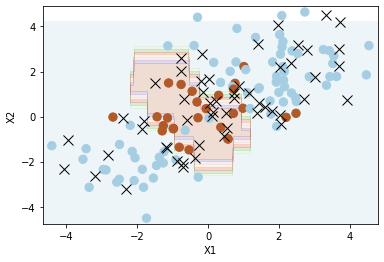

Number of support vectors:  54


In [64]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

[ 2.71381616  1.42845036 -2.41067276 -0.19057049  0.72541158  1.62164143
 -1.46259295 -1.56206865  2.07399013  0.8766732   1.8186619  -1.15517575
  0.05302969  0.13020064 -0.70215687 -0.67000276 -0.59232372 -0.75278761
  0.74130414  1.14789767 -0.7778395  -0.36641793  0.50190196  0.11737178
 -1.80838486  0.2113841  -0.86512186  2.04652928  1.38799428]
[ 0.79918652  0.60999683 -0.04083284  1.56392794  0.82705629  1.20838473
 -1.83692936 -2.09078296 -0.34678306  1.33596453  0.25018474 -1.38696727
  0.61365047  0.22088696 -2.06731005  0.77030502 -0.14480357  2.03596714
  1.05448095  1.06593639  2.58088512 -1.83728181  0.17031622  0.00805618
 -0.18966273  0.71028161 -1.98593098  0.0701515   0.15122717]


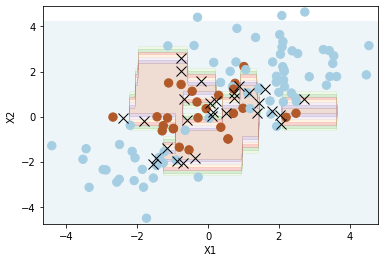

Number of support vectors:  29


In [65]:
# Increasing C parameter, allowing more flexibility svm2 = SVC(C=100, kernel='rbf', gamma=1.0) svm2.fit(X_train, y_train)
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)


In [66]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='f1')
clf.fit(X_train,y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

[-1.18058763  0.03094408  3.93494274  1.42845036 -2.41067276 -3.94290072
 -0.19057049 -0.18423032  3.68809504  3.34137407  1.97778179  0.72541158
  3.70202996  1.61119839 -4.07860947 -0.70886688 -1.87150035  2.07399013
  0.8766732   1.8186619  -1.15517575 -2.32025901  2.61175799  0.05302969
  0.13020064  3.72783617 -0.70215687 -0.67000276 -0.59232372 -0.75278761
  0.74130414  1.14789767 -0.2484897  -1.49394832 -0.7778395  -0.36641793
  0.50190196 -1.80838486  0.2113841   0.54040946 -0.1460668  -0.86512186
  2.04652928  1.38799428]
[-1.33782272  1.67303168  0.72510773  0.60999683 -0.04083284 -1.0212582
  1.56392794  2.7989106   2.22378562  4.53135684  4.06593628  0.82705629
  3.0060937   0.44346421 -2.32270309 -2.24150177 -0.55114341 -0.34678306
  1.33596453  0.25018474 -1.38696727 -3.19455274  2.65766052  0.61365047
  0.22088696  4.20455628 -2.06731005  0.77030502 -0.14480357  2.03596714
  1.05448095  1.06593639 -1.2566265   1.50269297  2.58088512 -1.83728181
  0.17031622 -0.18966273  

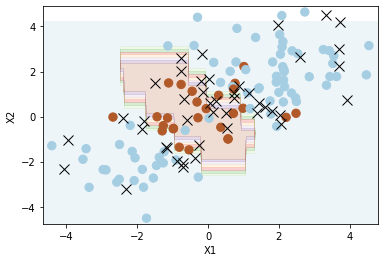

Number of support vectors:  44
[[72  2]
 [12 14]]
0.86


In [67]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))